In [10]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8

Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up gnupg (2.1.15-1ubuntu8.1) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting 

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [12]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p MyDrive
!google-drive-ocamlfuse MyDrive

In [14]:
% cd MyDrive


/content/MyDrive


We will explore the problem of flower classification and the role of feature selection in it. Given a set of features parameterizing the flower, the objective is to :



*   Extract a subset of features and how to do that in python
*   Analyze the best subset for the task, by exhaustive search of all options



In this experiment, we will use the dataset named as bezdekIris. The dataset has 3 classes and 4 features.

IRIS_Dataset is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day.

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**What could be the possible features to distinguish these flowers?**

**Data Attributes**



*   sepal length in cm
*   sepal width in cm
*   petal length in cm
*  petal width in cm


>class:

1.   Iris Setosa
2.   Iris Versicolour

1.   Iris Virginica






**Data Source**

https://archive.ics.uci.edu/ml/datasets/iris

**Feature Selection**

When we use the data with large number of features or dimensionality, models usually choke because

1.   Training time increases exponentially with number of features.
2.  Models have increasing risk of over fitting with increasing number of features.


Feature Selection helps with these problems by reducing the dimensions without much loss of the total information. In other words feature selection is a field of research which wants to help algorithmically pick out important features.

In [0]:
# Let us import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Let us set up the files
dataset = "colab_docs/DEMO_LAB/AIML_DS_BEZDEKIRIS_STD.data"

In [17]:
# Let us read the data from the file and see the first five rows of the data
data = pd.read_csv(dataset, header = None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


From above we can observe that labels are in string format. Now we will convert the labels column as 0 for "iris-setosa", 1 for "iris-versicolor" and 2 for "iris-virginica" and we will store the converted data in variable iris_data.

In [0]:
def irisLabel(s):
  s = s.lower()
  if s == "iris-setosa":
    return 0
  if s == "iris-versicolor":
    return 1
  if s == "iris-virginica":
    return 2
iris_data = pd.read_csv(dataset,header=None, converters={4:irisLabel})

In [19]:
# Now we display the first five rows of the data
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we will see how to extract the features from the data with the example.



```
# Let  X  be the two class IRIS Dataset. Let  A  be a  2×4  matrix as given below:

A=   [1  0  0  0 ]
    
     [0  1  0  0 ]
     
     
     Compute  X′=AX .
     Plot this  X′  on 2D graph
     
```

  

In [0]:
# Now we will seperate the features and labels and store them in features and lables variables.

Features = iris_data.iloc[:,0:4].values
Labels = iris_data.iloc[:,4:5].values

In [0]:
## Now store Feature matrix as X
X = Features

In [22]:
## We are creating a matrix 'A' as considered above.

A = np.array([[1,0,0,0],[0,1,0,0]])
print(A)

[[1 0 0 0]
 [0 1 0 0]]


In [23]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

As A is 2  ∗  4 matrix. To compute X' convert X into 4  ∗  150 using transpose function. As for matrix multiplication dimensions should match

In [25]:
X_transpose = np.transpose(X)
print(X_transpose)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
  2.6 3.  2.

Compute X' same as X1. Only the name is changed. X1 is now 2*150 dimensional. Meaning we have extracted 2 features out of 4.

X1 = np.matmul(A,X_transpose)

In [26]:
X1 = A @ X_transpose ## @ - symbol used for matrix multiplication
print(X1.shape)

(2, 150)


In [27]:
## Converting the matrix X1 back to 150*2 and append label creating X1_final of 150*3
X2 = np.transpose(X1)
X1_final = np.hstack((X2,Labels))
print(X1_final)

[[5.1 3.5 0. ]
 [4.9 3.  0. ]
 [4.7 3.2 0. ]
 [4.6 3.1 0. ]
 [5.  3.6 0. ]
 [5.4 3.9 0. ]
 [4.6 3.4 0. ]
 [5.  3.4 0. ]
 [4.4 2.9 0. ]
 [4.9 3.1 0. ]
 [5.4 3.7 0. ]
 [4.8 3.4 0. ]
 [4.8 3.  0. ]
 [4.3 3.  0. ]
 [5.8 4.  0. ]
 [5.7 4.4 0. ]
 [5.4 3.9 0. ]
 [5.1 3.5 0. ]
 [5.7 3.8 0. ]
 [5.1 3.8 0. ]
 [5.4 3.4 0. ]
 [5.1 3.7 0. ]
 [4.6 3.6 0. ]
 [5.1 3.3 0. ]
 [4.8 3.4 0. ]
 [5.  3.  0. ]
 [5.  3.4 0. ]
 [5.2 3.5 0. ]
 [5.2 3.4 0. ]
 [4.7 3.2 0. ]
 [4.8 3.1 0. ]
 [5.4 3.4 0. ]
 [5.2 4.1 0. ]
 [5.5 4.2 0. ]
 [4.9 3.1 0. ]
 [5.  3.2 0. ]
 [5.5 3.5 0. ]
 [4.9 3.6 0. ]
 [4.4 3.  0. ]
 [5.1 3.4 0. ]
 [5.  3.5 0. ]
 [4.5 2.3 0. ]
 [4.4 3.2 0. ]
 [5.  3.5 0. ]
 [5.1 3.8 0. ]
 [4.8 3.  0. ]
 [5.1 3.8 0. ]
 [4.6 3.2 0. ]
 [5.3 3.7 0. ]
 [5.  3.3 0. ]
 [7.  3.2 1. ]
 [6.4 3.2 1. ]
 [6.9 3.1 1. ]
 [5.5 2.3 1. ]
 [6.5 2.8 1. ]
 [5.7 2.8 1. ]
 [6.3 3.3 1. ]
 [4.9 2.4 1. ]
 [6.6 2.9 1. ]
 [5.2 2.7 1. ]
 [5.  2.  1. ]
 [5.9 3.  1. ]
 [6.  2.2 1. ]
 [6.1 2.9 1. ]
 [5.6 2.9 1. ]
 [6.7 3.1 1. ]
 [5.6 3.  

**Putting it all together**

In [0]:
## Now store Feature matrix as X
X = Features

## Create matrix A as given in the Exercise above
A = np.array([[1,0,0,0],[0,0,0,1]])

## As A is 2*4 matrix. To compute X' convert X into 4*150 using transpose function. 
##As for matrix multiplication dimensions should match
X_transpose = np.transpose(X)

## Compute X' same as X1. Only the name is changed. X1 is now 2*150 dimensional.
## Meaning we have extracted 2 features out of 4
X1 = A @ X_transpose

## Convert the matrix X1 back to 150*2 and append label creating X1_final of 150*3
X2 = np.transpose(X1)
X1_final = np.hstack((X2,Labels))

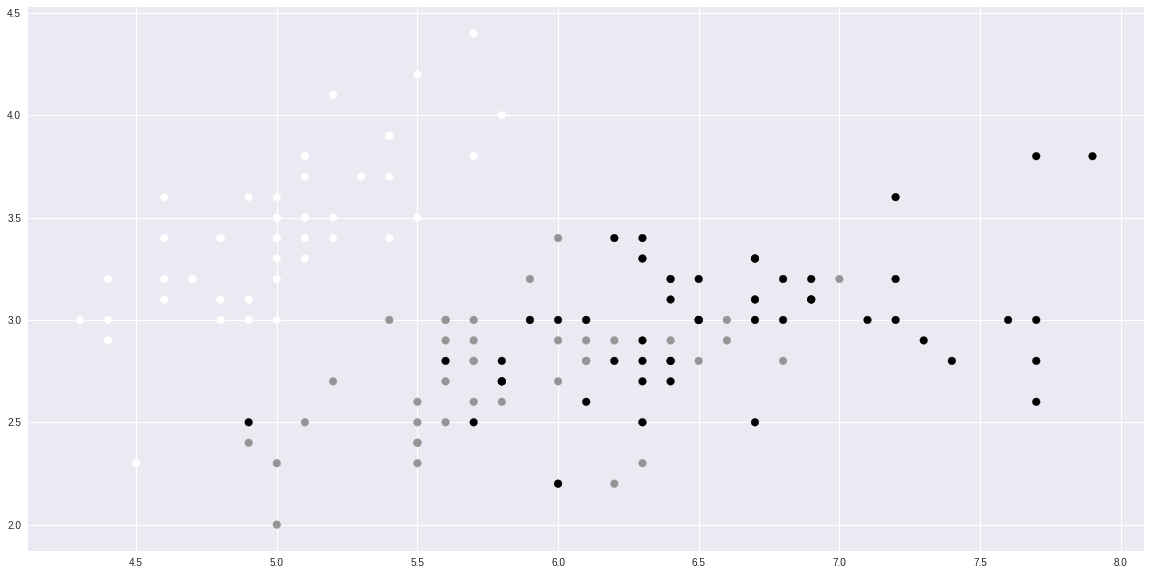

In [28]:
#Plot the points on graph and visualize.
plt.figure(1, figsize=(20,10))
plt.scatter(X1_final[:,0],X1_final[:,1],c=X1_final[:,2],s=60)
plt.show()

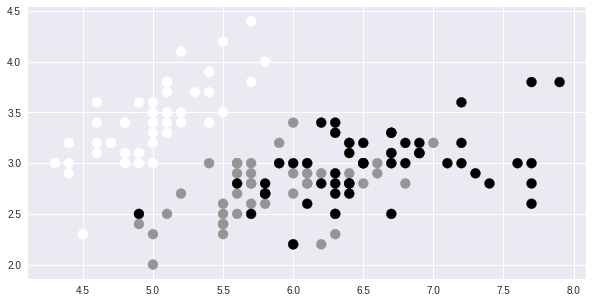

In [32]:
## c denotes color for all classes and s denotes size of plots in b elow case its bullet points
plt.figure(2, figsize=(10,5))
plt.scatter(X1_final[:,0],X1_final[:,1],c=X1_final[:,2],s=100)
plt.show()

# Exercise 1
Repeat the above Example with a new matrix A, given below;

\begin{equation*}
A2 =
\begin{bmatrix}
   0 & 1 & 0 & 0\\
   0 & 0 & 1 & 0\\
\end{bmatrix}
\end{equation*}

 1. Compute $X^{\prime} = AX$ ? 
 2. Plot this X on 2D graph.

In [0]:
import numpy as np

B = np.array([[0,1,0,0],[0,0,1,0]])
Features = iris_data.iloc[:,0:4].values
Labels = iris_data.iloc[:,4:5].values
Y = Features
Y_transpose = np.transpose(Y)

Y1 = B @ Y_transpose

Y1 = np.transpose(Y1)
Y1_final = np.hstack((Y1,Labels))




In [0]:
import matplotlib.pyplot as plt

plt.figure(3,figsize = (20,10))
plt.scatter(Y1_final[:,0],Y1_final[:,1], c= Y1_final[:,2],s=50)
plt.show()

A  is selecting 2 features to plot Iris Dataset. A is 2×4 matrix where 2 means number of features you want and 4 means total number of features in Dataset.

### Summary

We mainly use feature selection techinques to get insights about the features and their relative importance with the target variable.The idea is to keep most relevant but not redundant feature for predictive model that can yield optimal accuracy.